In [5]:
#Veda Kshirsagar
#TE_A_61
#Experiment 4
#House price prediction on Boston housing dataset using linear regression

In [6]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("/content/HousingData.csv")

In [12]:
df.shape

(506, 14)

In [14]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [16]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [17]:
df["CRIM"].fillna(df["CRIM"].mean(),inplace=True)
df["ZN"].fillna(df["ZN"].mean(),inplace=True)
df["INDUS"].fillna(df["INDUS"].mean(),inplace=True)
df["CHAS"].fillna(df["CHAS"].mean(),inplace=True)
df["AGE"].fillna(df["AGE"].mean(),inplace=True)
df["LSTAT"].fillna(df["LSTAT"].mean(),inplace=True)

In [18]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [19]:
x = df.drop(["MEDV"],axis = 1)

In [20]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [21]:
y = df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [25]:
lm.fit(xtrain, ytrain)

LinearRegression()

In [26]:
ytrain_predict = lm.predict(xtrain)

In [27]:
ytest_predict = lm.predict(xtest)

In [28]:
ytrain_predict

array([21.45400183, 18.61164808, 19.29483138, 22.36528043, 20.17932839,
       25.0329299 , 19.66820222, 30.19401283, 12.91737277, 28.03479631,
       16.58108057, 21.83573655, 31.45799979, 32.59348841, 17.66408555,
       25.46194814, 16.94771916, 15.24625487, 19.62710811, 34.18347269,
       23.52047744, 21.86350923, 15.30802044, 25.38254553,  8.59172636,
       13.52067365, 15.45319192, 21.66891603, 17.89073478, 23.05221555,
       30.99614571, 14.64170704, 15.91235451, 16.5634754 , 17.63746633,
        9.4780301 , 11.70771983, 21.5156678 , 16.77334838, 23.81517603,
       34.63447123, 13.82103143, 28.65942755, 12.83827924, 38.56961297,
       25.43184385, 14.25883387, 24.1375704 , 25.06305166, 15.58187512,
       39.24457894, 16.15917218, 26.65952839, 15.8674531 , 18.20531607,
       20.35879865, 42.53201222, 21.15987921, 33.01619   , 33.56138658,
       25.83233003, 24.92149398, 32.84069516, 34.03503441, 18.06867454,
       28.97802204, 21.94619128, 21.74529478, 25.51673319, 21.10

In [36]:
lm.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.01887105])

In [37]:
ytest_predict

array([46.91342908, 36.42423825, 22.82714101,  9.09974111, 19.29949809,
       18.42901266, 15.42899607, 25.9254254 , 11.77065329,  3.77757637,
       23.90160094, 18.06598695, 30.01887105, 20.99768285, 12.75780097,
       26.07508838, 31.92969102, 12.67352863, 21.72880308, 27.45164242,
       25.26169435, 32.72163235, 31.06067117, 21.25166097, 30.87214818,
       26.618919  ,  7.9892728 , 27.68221962, 11.34503663, 18.91367484,
       22.53154108,  7.73032381, 24.37386226, 19.32844195, 21.37126478,
       18.86944961, 20.64387831, 12.63745376, 31.5739614 , 20.62744942,
       31.68523353, 34.15119606, 19.38128859,  9.7631175 , 19.06285065,
       29.26903781, 18.15586262, 15.2435364 , 18.24860986, 19.16500843,
       22.78465639, 28.39811872, 30.16430773, 10.47214881, 11.33730408,
       18.66034709, 19.35518877, 18.78267406, 34.93442885, 32.46008632,
       30.9205216 , 16.28153937,  5.82220984, 23.07240442, 23.14943443,
       35.70882379, 19.53392662, 12.73796655, 24.2560076 , 16.52

In [38]:
ytrain

505    11.9
128    18.0
124    18.8
338    20.6
109    19.4
       ... 
282    46.0
396    12.5
189    34.9
452    16.1
194    29.1
Name: MEDV, Length: 404, dtype: float64

In [39]:
ytest

283    50.0
196    33.3
330    19.8
392     9.7
337    18.5
       ... 
105    19.5
300    24.8
313    21.6
438     8.4
270    21.1
Name: MEDV, Length: 102, dtype: float64

In [40]:
df1 = pd.DataFrame(ytrain_predict,ytrain)

In [41]:
df2 = pd.DataFrame(ytest_predict,ytest)

In [42]:
df1

,0
MEDV,
11.9,21.454002
18.0,18.611648
18.8,19.294831
20.6,22.365280
19.4,20.179328
...,...
46.0,42.143794
12.5,19.152874
34.9,35.135879


In [43]:
df2

,0
MEDV,
50.0,46.913429
33.3,36.424238
19.8,22.827141
9.7,9.099741
18.5,19.299498
...,...
19.5,18.439617
24.8,30.901966
21.6,24.678562


In [44]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest,ytest_predict)

In [45]:
print(mse)

34.342115876882815


In [46]:
mse = mean_squared_error(ytrain,ytrain_predict)
print(mse)

20.474590582616557


In [47]:
r2 = r2_score(ytest, ytest_predict)
r2

0.5653602213727167

In [48]:
#visualizing the training and testing data using sctter plot

In [49]:
import matplotlib.pyplot as plt

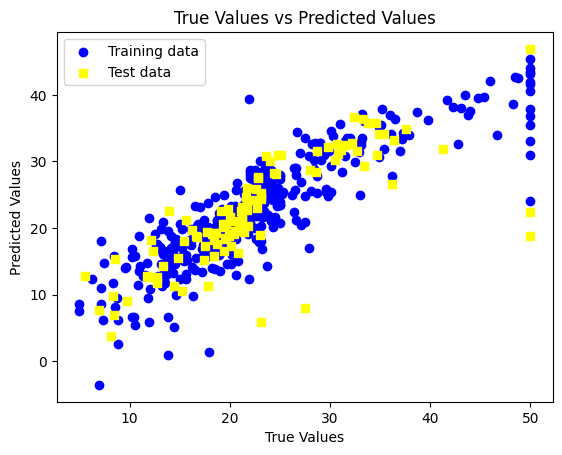

In [54]:
plt.scatter(ytrain, ytrain_predict, c='blue', marker='o',  label='Training data')
plt.scatter(ytest, ytest_predict, c='yellow', marker='s',  label='Test data')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs Predicted Values")
plt.legend(loc="upper left")
plt.plot()
plt.show()